# Investigating the Factors that Determine How Addictive a Drug is



## Project Focus

From antibiotics for serious bacterial infections to antidepressants for mental health illnesses, modern medicine offers numerous solutions to a diverse range of medical conditions. This advancement has been exponential in the past few years with the increase in research and testing of various drugs. In doing so, they are accompanied by various side effects like nausea, dizziness, headaches, dry cough, and many more. However, while side effects can range from mildly uncomfortable to moderately challenging, there is a greater risk that comes along. Many of the drugs that can be habit-forming amongst patients. This can greatly hinder a patient’s quality of life and, in extreme cases, lead to death. Inspired by the growing Opioid Crisis in North America, this project focuses on whether the drugs in the current market are addictive or not.

## Dataset Description

The dataset contains a detailed list of drugs used with a variety of medical conditions along with the side effects they present and what other drugs can be substituted in their place. Accompanying this information are classifying attributes like the therapeutic class (what the medication treats), action class (what the medication does), chemical class (what the medication does when it enters the body), and finally, whether the drug is habit-forming or not.

Dataset Related Info.:

There are total of 5 substitutes columns in the dataset.
There are total of 41 Side Effects columns in the dataset. Drugs with less side effects have those columns as blank.
There are total of 5 usage columns in the dataset.
Rest Columns have their own individual identity.

Substitute : It indicates that whatever is the name of the medicine, if the consumer want's to know alternative medicine that have same compositions but manufactured by different manufacturers. So we have provided 5 substitutes for each drug/medicine.

Therapeutic Class : It is a way of classifying medical drugs according to their functions. Each therapeutic class is a group of similar medications classified together because they are intended to treat the same medical conditions. for eg.: Respiratory is one of the class, so all medication treating this illness comes under the same class.

Action Class : It is the way of classifying medications based on actions they perform such as "H2 Receptor Blocker" It Block H2 receptors in parietal cells of the stomach → decrease gastric acid secretion. So drugs with similar action are grouped under "H2 Receptor Blocker".

Chemical Class : As name suggests, it is grouping based on chemical compound used.

Habit Forming : It is classified as YES or NO. It is defined as the process of forming a habit, referring generally to psychological dependence on the continued use of a drug to maintain a sense of well-being, which can result in drug addiction. If there are chances of drug addiction, then it is set to YES otherwise NO.

The authors of the dataset are Shudhanshu Singh, Vishal Thakur, Vivek Tiwari.

The dataset can be found on Kaggle here: https://www.kaggle.com/datasets/shudhanshusingh/250k-medicines-usage-side-effects-and-substitutes/code

All information within the dataset was collected from: https://www.drugs.com.


### Loading and Checking Data

In [1]:
#load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#get dataframe online
url = "https://raw.githubusercontent.com/4vantikanair/Project/main/medicine_dataset.csv"
mediuse_df = pd.read_csv(url, sep=',')

In [3]:
#check first five rows of dataframe
mediuse_df.head(5)

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


In [4]:
mediuse_df = mediuse_df.drop('id', axis=1)

#check null values
mediuse_df.isnull().sum()*100/len(mediuse_df)

name                  0.000000
substitute0           3.866359
substitute1           5.781611
substitute2           7.245647
substitute3           8.606145
substitute4           9.772055
sideEffect0           0.000000
sideEffect1           3.948948
sideEffect2           7.540952
sideEffect3          16.348532
sideEffect4          34.106310
sideEffect5          47.119870
sideEffect6          62.993417
sideEffect7          72.705444
sideEffect8          80.458307
sideEffect9          84.808515
sideEffect10         89.012078
sideEffect11         91.809216
sideEffect12         93.440443
sideEffect13         94.066909
sideEffect14         95.802480
sideEffect15         96.905543
sideEffect16         97.579144
sideEffect17         97.831745
sideEffect18         98.181034
sideEffect19         98.410268
sideEffect20         98.701545
sideEffect21         98.741026
sideEffect22         98.772047
sideEffect23         98.829658
sideEffect24         98.902980
sideEffect25         99.394484
sideEffe

In [5]:
#drop columns whose null values exceed 50%
mediuse_df.dropna(axis=1, thresh=0.5*len(mediuse_df), inplace=True)
mediuse_df.isnull().sum()*100/len(mediuse_df)

name                  0.000000
substitute0           3.866359
substitute1           5.781611
substitute2           7.245647
substitute3           8.606145
substitute4           9.772055
sideEffect0           0.000000
sideEffect1           3.948948
sideEffect2           7.540952
sideEffect3          16.348532
sideEffect4          34.106310
sideEffect5          47.119870
use0                  0.000000
Chemical Class       44.487910
Habit Forming         0.000000
Therapeutic Class     0.027798
Action Class         44.389206
dtype: float64

In [6]:
#fill null values with most frequent occurance
mediuseclean_df = mediuse_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
mediuseclean_df.isnull().sum()*100/len(mediuseclean_df)
#ensure all object values are string values
mediuse_df=mediuse_df.astype(str)

## EDA

In [7]:
#check the number of each unique value in Therapeutic Class
mediuseclean_df["Therapeutic Class"].value_counts()

Therapeutic Class
ANTI INFECTIVES                57572
GASTRO INTESTINAL              33630
PAIN ANALGESICS                32267
NEURO CNS                      23319
RESPIRATORY                    23052
CARDIAC                        18381
ANTI DIABETIC                  11679
OPHTHAL                        10573
DERMA                           9883
HORMONES                        5629
GYNAECOLOGICAL                  4406
VITAMINS MINERALS NUTRIENTS     4216
ANTI NEOPLASTICS                3513
BLOOD RELATED                   2659
UROLOGY                         1844
OPHTHAL OTOLOGICALS             1725
ANTI MALARIALS                  1679
SEX STIMULANTS REJUVENATORS      723
OTOLOGICALS                      485
OTHERS                           481
VACCINES                         329
STOMATOLOGICALS                  173
Name: count, dtype: int64

Text(0, 0.5, 'Functional Classfication')

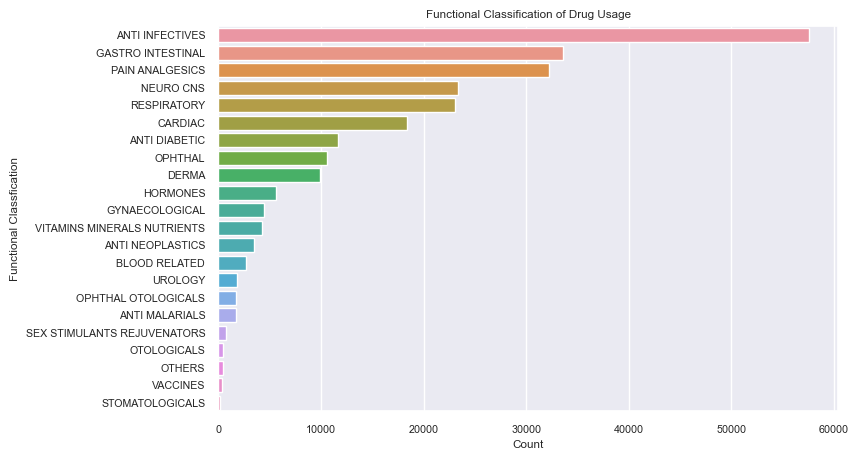

In [8]:
#create a count dataset for types of medication
thera_counts = mediuseclean_df["Therapeutic Class"].value_counts().reset_index()
thera_counts.columns = ['Therapeutic Class', 'Count']

#plot graph
plt.figure(figsize=(8,5))


sns.set(style="darkgrid")
sns.set(font_scale = 0.7)
sns.set_palette("crest")
sns.barplot(x=thera_counts["Count"], y=thera_counts["Therapeutic Class"]).set(title="Functional Classification of Drug Usage")
plt.xlabel("Count")
plt.ylabel("Functional Classfication")





([<matplotlib.patches.Wedge at 0x12b8efc7c80>,
 [Text(-1.0968266034087804, 0.08349492232919356, 'No'),
  Text(1.0968265985229293, -0.0834949865118921, 'Yes')],
 [Text(-0.5982690564047892, 0.04554268490683285, '97.6%'),
  Text(0.5982690537397796, -0.04554271991557751, '2.4%')])

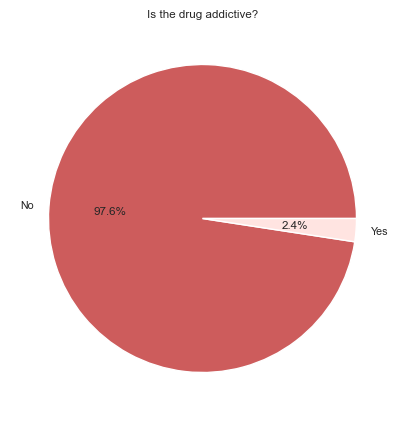

In [9]:
#create a dataset with the number of addictive vs nonaddctive drugs
percent_addictive = mediuseclean_df["Habit Forming"].value_counts()

#plot pie chart
plt.figure(figsize=(10,5))
plt.title("Is the drug addictive?")

plt.pie(percent_addictive, labels=percent_addictive.index, autopct='%0.1f%%', colors=['indianred','mistyrose'])


Text(0, 0.5, 'Count')

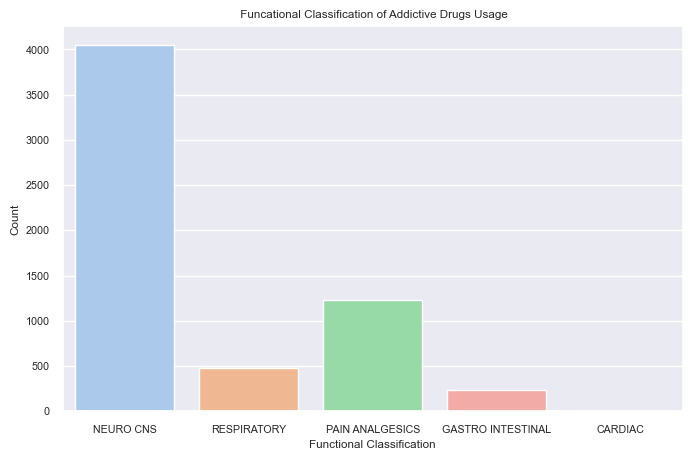

In [10]:
#create a dataset with only therapeutic class of addictive drugs
addictive = mediuseclean_df.loc[mediuseclean_df["Habit Forming"] == "Yes"]
addthera_counts = addictive["Therapeutic Class"].value_counts().reset_index()
addthera_counts.columns = ["Therapeutic Class", "Count"]

#plot bar graph
plt.figure(figsize=(8,5))
sns.set_palette("pastel")

sns.countplot(data=addictive, x="Therapeutic Class").set(title=" Funcational Classification of Addictive Drugs Usage")
plt.xlabel("Functional Classification")
plt.ylabel("Count")


In [11]:
#check top five uses of addictive drugs
addictive.use0.value_counts().sort_values(ascending=False).head(5)

use0
Treatment of Anxiety disorder    1546
 Moderate to severe pain          805
Treatment of Anxiety              707
 Pain relief                      365
Treatment of Insomnia             339
Name: count, dtype: int64

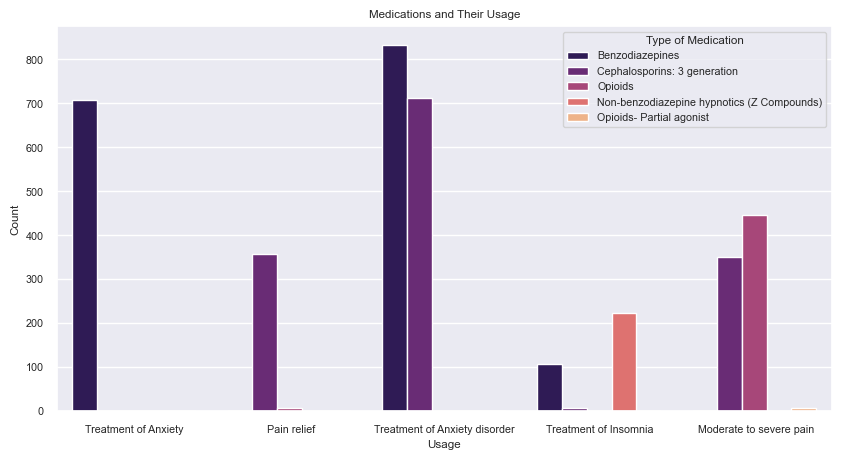

In [12]:
#create a dataset for top five uses of addictive drugs and their action classes
topuse = addictive[addictive.groupby("use0")['use0'].transform('size') > 338]
topuse[['Action Class', 'use0']].groupby(['Action Class', 'use0']).count().reset_index()

#plot the resulting bar graph
plt.figure(figsize=(10,5))
sns.countplot(x='use0', data=topuse, hue='Action Class', palette='magma').set(title="Medications and Their Usage")
plt.xlabel("Usage")
plt.ylabel("Count")
plt.legend(title="Type of Medication")

## Preparing the Dataset

### Data Cleaning

In [13]:
#handle duplicate data
mediuseclean_df = mediuse_df[mediuse_df.duplicated(keep=False)]

#drop side effects and substitutes
mediuseclean_df = mediuseclean_df[["use0","Chemical Class", "Habit Forming", "Therapeutic Class", "Action Class"]]

# # mediuseclean_df = mediuseclean_df.drop(["sideEffect5"])
mediuseclean_df

,use0,Chemical Class,Habit Forming,Therapeutic Class,Action Class
7,Treatment of Bacterial infections,Macrolides,No,ANTI INFECTIVES,Macrolides
17,Treatment of Dry cough,nan,No,RESPIRATORY,nan
33,Prevention of heart attack and stroke,Triazolopyrimidines,No,BLOOD RELATED,P2Y12 inhibitors (ADP receptor)
35,Treatment of Gout,Carboxylic acid derivative,No,UROLOGY,Uricosuric agent-gout
46,Treatment of Bacterial infections,Macrolides,No,ANTI INFECTIVES,Macrolides
...,...,...,...,...,...
248204,Treatment of Muscular pain,nan,No,PAIN ANALGESICS,nan
248205,Treatment of Bacterial infections,Broad spectrum (Third & fourth generation ceph...,No,ANTI INFECTIVES,Cephalosporins: 3 generation
248211,Treatment of Bacterial infections,Broad spectrum (Third & fourth generation ceph...,No,ANTI INFECTIVES,Cephalosporins: 3 generation
248213,Treatment of Muscular pain,nan,No,PAIN ANALGESICS,nan


### Data Preprocessing

In [14]:
#Pipeline packages
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import FeatureHasher
from sklearn import preprocessing


#extract name of categorical columns
cat_cols = ['use0', 'Chemical Class', 'Therapeutic Class', 'Action Class']

#create pipeline
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), FeatureHasher(n_features=12, input_type='string', alternate_sign=False))

#set transformation using ColumnTransformer
preprocessor = ColumnTransformer([('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

#code from notebooks course eclass page

In [15]:
#display pipeline
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(alternate_sign=False,
                                                                input_type='string',
                                                                n_features=12))]),
                                 ['use0', 'Chemical Class', 'Therapeutic Class',
                                  'Action Class'])])

In [16]:
#fit data and make dataframe
mediuseprep = preprocessor.fit_transform(mediuseclean_df)
mediuseprep = pd.DataFrame(preprocessor.fit_transform(mediuseclean_df))

#confirm data is imbalanced
mediuseprep[12].value_counts()
num = {'Yes': 1.0, 'No': 0.0}
mediuseprep[12] = mediuseprep[12].replace(num)

mediuseprep

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
1,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46977,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46978,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
46979,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
46980,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
mediuseprep[12].value_counts()

12
0.0    45922
1.0     1060
Name: count, dtype: int64

## Model Training and Evaluation

The dataset is imbalanced so we need to resample it

In [18]:
#Resample package
from sklearn.utils import resample

#define majority and minority
majority = mediuseprep[mediuseprep[12] == 0.0]
minority = mediuseprep[mediuseprep[12] == 1.0]

# Upsample the minority class and join it to majority class
minority_upsampled  = resample(minority, replace=True, n_samples=len(majority))
balanced_mediuse = pd.concat([majority, minority_upsampled])

#confirm dataframe is not imbalanced
balanced_mediuse[12].value_counts()

12
0.0    45922
1.0    45922
Name: count, dtype: int64

### Create Train and Test Data

In [19]:
#create testing and training sets
from sklearn.model_selection import train_test_split

X = balanced_mediuse.drop([12], axis=1)
y = balanced_mediuse[12]

#split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Model 1: Logistic Regression

In [20]:
#package to create classification table and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Create model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(class_weight="balanced")
LR_model.fit(X_train, y_train)
y_predict_LR = LR_model.predict(X_test)


#print report
print (classification_report(y_test, y_predict_LR))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      9156
         1.0       0.90      0.86      0.88      9213

    accuracy                           0.88     18369
   macro avg       0.88      0.88      0.88     18369
weighted avg       0.88      0.88      0.88     18369



### Model 2: Decision Tree

In [21]:
#create model 2: Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
DT_model.fit(X_train, y_train)
y_predict_DT = DT_model.predict(X_test)

#print report
print(classification_report(y_test, y_predict_DT))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      9156
         1.0       0.90      0.88      0.89      9213

    accuracy                           0.89     18369
   macro avg       0.89      0.89      0.89     18369
weighted avg       0.89      0.89      0.89     18369



### Model 3: Random Forest

In [22]:
#create model 3: Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(max_depth=5, class_weight='balanced')
RF_model.fit(X_train, y_train)
y_predict_RF = RF_model.predict(X_test)

#print report
print (classification_report(y_test, y_predict_RF))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      9156
         1.0       0.91      0.91      0.91      9213

    accuracy                           0.91     18369
   macro avg       0.91      0.91      0.91     18369
weighted avg       0.91      0.91      0.91     18369



### Model 4: Naive Bayes

In [23]:
#create model 4: Naive Bayes
from sklearn.naive_bayes import CategoricalNB
CNB_model = CategoricalNB()
CNB_model.fit(X_train, y_train)
y_predict_CNB = CNB_model.predict(X_test)

#print report
print (classification_report(y_test, y_predict_CNB))


              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      9156
         1.0       0.88      0.71      0.79      9213

    accuracy                           0.81     18369
   macro avg       0.82      0.81      0.80     18369
weighted avg       0.82      0.81      0.80     18369



### Model 5: KNN

In [24]:
#create model 5: KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
y_predict_KNN = KNN_model.predict(X_test)

#print report
print (classification_report(y_test, y_predict_KNN))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      9156
         1.0       0.96      0.92      0.94      9213

    accuracy                           0.94     18369
   macro avg       0.94      0.94      0.94     18369
weighted avg       0.94      0.94      0.94     18369



### Cross Validation of all Models

In [25]:
#cross validate all models
from sklearn.model_selection import cross_validate

cvLR = cross_validate(LR_model, X_train, y_train, cv = 5)
cvDT = cross_validate(DT_model, X_train, y_train, cv = 5)
cvRF = cross_validate(RF_model, X_train, y_train, cv = 5)
cvCNB = cross_validate(CNB_model, X_train, y_train, cv = 5)
cvKNN = cross_validate(KNN_model, X_train, y_train, cv = 5)


In [26]:
#calculate mean of accuracy scores and print it
meanLR = cvLR['test_score'].mean()
meanDT = cvDT['test_score'].mean()
meanRF = cvRF['test_score'].mean()
meanCNB = cvCNB['test_score'].mean()
meanKNN = cvKNN['test_score'].mean()

print(f'Cross-Validation Mean Accuracy of Logistic Regression Model: ' + str(meanLR))
print(f'Cross-Validation Mean Accuracy of Decision Tree Model: ' + str(meanDT))
print(f'Cross-Validation Mean Accuracy: of Random Forest Model:' + str(meanRF))
print(f'Cross-Validation Mean Accuracy of Naive Bayes Model: ' + str(meanCNB))
print(f'Cross-Validation Mean Accuracy of KNN Model: ' + str(meanKNN))

Cross-Validation Mean Accuracy of Logistic Regression Model: 0.886097312010888
Cross-Validation Mean Accuracy of Decision Tree Model: 0.893623681524328
Cross-Validation Mean Accuracy: of Random Forest Model:0.9143654304185098
Cross-Validation Mean Accuracy of Naive Bayes Model: 0.8166995576726777
Cross-Validation Mean Accuracy of KNN Model: 0.9412181013950323


### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

hyperparameters_LR = dict(C=np.linspace(0.1, 2.0, 2),
                       solver=['newton-cholesky', 'sag', 'saga'])
LR_model_hp = RandomizedSearchCV(LR_model, hyperparameters_LR)
LR_model_hp.fit(X_train, y_train)
bestLR_model = LR_model_hp.best_estimator_
bestLR_model.score(X_test, y_test)

0.8815395503293593

In [28]:
bestLR_model

LogisticRegression(C=0.1, class_weight='balanced', solver='newton-cholesky')

In [29]:
hyperparameters_DT = dict(max_depth=range(1,10),
                          min_samples_split=np.linspace(0.1, 2.0, 2),
                          min_samples_leaf=np.linspace(0.1, 1.0, 2),
                          max_features=range(1,10)
                          )
DT_model_hp = RandomizedSearchCV(DT_model, hyperparameters_DT)
DT_model_hp.fit(X_train, y_train)
bestDT_model = DT_model_hp.best_estimator_
bestDT_model.score(X_test, y_test)

0.8300397408677663

In [30]:
bestDT_model

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_features=7,
                       min_samples_leaf=0.1, min_samples_split=0.1)

In [31]:
hyperparameters_RF = dict(max_depth=range(1,10),
                          min_samples_split=np.linspace(0.1, 2.0, 2),
                          min_samples_leaf=np.linspace(0.1, 1.0, 2),
                          )
RF_model_hp = RandomizedSearchCV(RF_model, hyperparameters_RF)
RF_model_hp.fit(X_train, y_train)
bestRF_model = RF_model_hp.best_estimator_
bestRF_model.score(X_test, y_test)

0.8261745331809026

In [32]:
bestRF_model


RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=0.1, min_samples_split=0.1)

In [33]:
hyperparameters_CNB = dict(alpha=np.linspace(0.1, 1.0, 2),
                          fit_prior=[True, False]
                          )

CNB_model_hp = RandomizedSearchCV(CNB_model, hyperparameters_CNB)
CNB_model_hp.fit(X_train, y_train)
bestCNB_model = CNB_model_hp.best_estimator_
bestCNB_model.score(X_test, y_test)

0.8061952202079591

In [34]:
bestCNB_model


CategoricalNB(alpha=0.1, fit_prior=False)

In [35]:
hyperparameters_KNN = dict(n_neighbors=np.arange(1, 10),
                          p=[1, 2],
                          weights=['uniform', 'distance'])

KNN_model_hp = RandomizedSearchCV(KNN_model, hyperparameters_KNN)
KNN_model_hp.fit(X_train, y_train)
bestKNN_model = KNN_model_hp.best_estimator_
bestKNN_model.score(X_test, y_test)

0.940552016985138

In [36]:
bestKNN_model


KNeighborsClassifier(n_neighbors=6, weights='distance')

### Model Evaluation and Comparison

We have three metrics to evaluate each class for each model.
The precision metric measures how many times a model can make a correct prediction regardless of a positive or negative outcome. It is high for all the models for both classes. Logistic Regression is the highest which means that out of all the models, Logistic Regression has a lesser rate of making a positive prediction when the outcome is negative. From this we can also deduce that the precision metric does not account for the measuring the rate of the models giving a negative prediction when the outcome was a positive one.

The Recall metric measures how many times a model can make a correct prediction when there are only positive outcomes. We can see that this is high for all classes with Logistic Regression having a 0.94 recall for class 0. This means that model has a high rate of making positive predictions among all outcomes that are positive. However, it does not deal with positive prediction when the outcome is negative.

The F1 metric uses both precision and recall to find their harmonic mean.  Out of all the scores across the metrics, the F1 is the lowest score. This is because the metric helps us maximize precision and recall. Thus, the higher the score, the better the model. We can see that the Logistic Regression model is the highest here.

Finally, the accuracy measures how many times a model can make a correct prediction out of the entire dataset. We can see that the scores here are identical to F1. Thus we can conclude that both accuracy and F1 scores are the most helpful when evaluating a model’s performance. 

After cross validating and fine tuning our models by selecting the right parameters, we can also see how the best version of each classification model scores. Combining everything we see that the KNN model performs the best.

## Best Performance: KNN Model

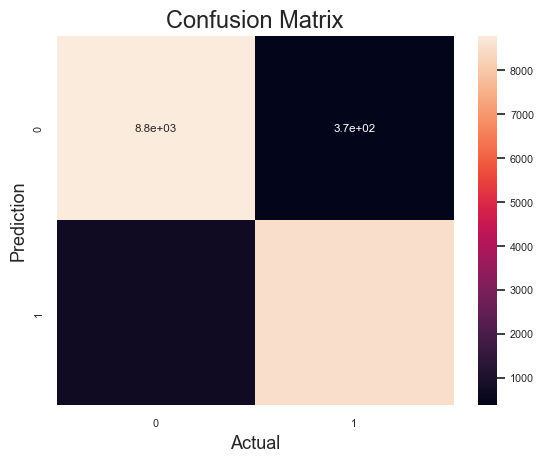

In [37]:
#create confusion matrix
KNN_matrix = confusion_matrix(y_test, y_predict_KNN)


sns.heatmap(KNN_matrix, annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

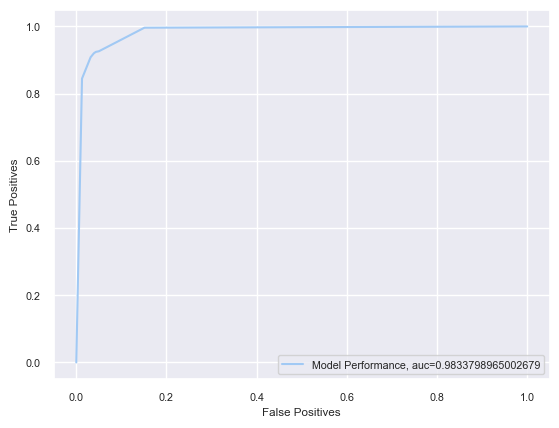

In [38]:
#plot ROC curve
from sklearn import metrics

y_pred = bestKNN_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Model Performance, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.show()

#code reused from https://www.statology.org/plot-roc-curve-python/

## Ensemble Method

We can see that all the models we selected have performed relatively well. Out of curiosity, let us see how combining the best versions of all the models into an ensemble will affect performance.

In [52]:
from sklearn.ensemble import StackingClassifier

estimators = [
 ('LR', LogisticRegression(C=0.1, class_weight='balanced', solver='newton-cholesky')), 
 ('DT', DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_features=7, min_samples_leaf=0.1, min_samples_split=0.1)), 
 ('RF', RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=0.1, min_samples_split=0.1)), 
 ('CNB', CategoricalNB(alpha=0.1, fit_prior=False)), 
 ('KNN', KNeighborsClassifier(n_neighbors=6, weights='distance'))]

Stacked_model = StackingClassifier(estimators=estimators)
Stacked_model.fit(X_train, y_train)
y_predict_model = Stacked_model.predict(X_test)

#print report
print (classification_report(y_test, y_predict_model))



              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      9156
         1.0       0.95      0.92      0.94      9213

    accuracy                           0.94     18369
   macro avg       0.94      0.94      0.94     18369
weighted avg       0.94      0.94      0.94     18369



In [53]:
from sklearn.metrics import accuracy_score

for i in [y_predict_LR, y_predict_DT, y_predict_RF, y_predict_CNB, y_predict_KNN, y_predict_model]:
    accuracy = accuracy_score(i, y_test)
    print(accuracy)


0.8815395503293593
0.894006206108117
0.9107735859328216
0.8061952202079591
0.940552016985138
0.9384833142794926


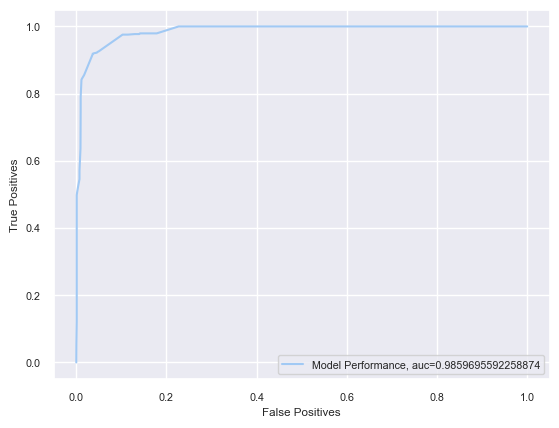

In [55]:
y_pred = Stacked_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Model Performance, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.show()

It seems the ensemble of models is just a little shy of performing as well as the KNN model. This could have something to do with the hyperparameter tuning and the model selection that went into creating the ensemble.

## Limitations and Next Steps

As with all datasets, there were several limitations to the model. For example, during the pipeline, I couldn’t directly perform one-hot encoding because of how vast the result would be. Instead, I performed label encoding first and that hinders the integrity of the dataset since the categories are not ordinal. In the future, we could potentially use an encoding method like feature hashing to handle the large amount of data.

UPDATE: I removed the label encoding and one hot encoding to attempt to do the feature hashing. There is still a lot more for me to learn about it so that could also potentially improve the model.

Another limitation of the dataset is the diverse range of categories in features like “use0” which shows what the medication treats. Some of the categories are separated simply because of the change in string. For example, the two categories “Treatment of Anxiety Disorder” and “Anxiety Disorder” can be one large category for “Anxiety”. To fix this, one would have to go through each value and check them individually. Because of the vastness of data and time constraints, this could not be accomplished.

The model mainly used features like the purpose of the drug, its chemical compound, what it treats, and what it does when ingested. Thus we can conclude that these are all very important factors for pharmaceutical companies, researchers, doctors, and patients to consider when making a decision related to medication.
